In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [26]:
# Load dataset
df = pd.read_csv("C:/Users/HP/Downloads/archive (4).zip")

In [27]:
# Tampilkan beberapa baris pertama
print(df.head())

   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  


In [28]:
# Cek missing values
print(df.isnull().sum())


CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64


In [29]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)

In [31]:
# Definisikan fitur dan target
X = df.drop("Class", axis=1)
y = df["Class"]

In [32]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)


In [35]:
# Melatih model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [36]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)


In [37]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8695652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        87
           1       0.85      0.78      0.82        51

    accuracy                           0.87       138
   macro avg       0.87      0.85      0.86       138
weighted avg       0.87      0.87      0.87       138

Confusion Matrix:
[[80  7]
 [11 40]]


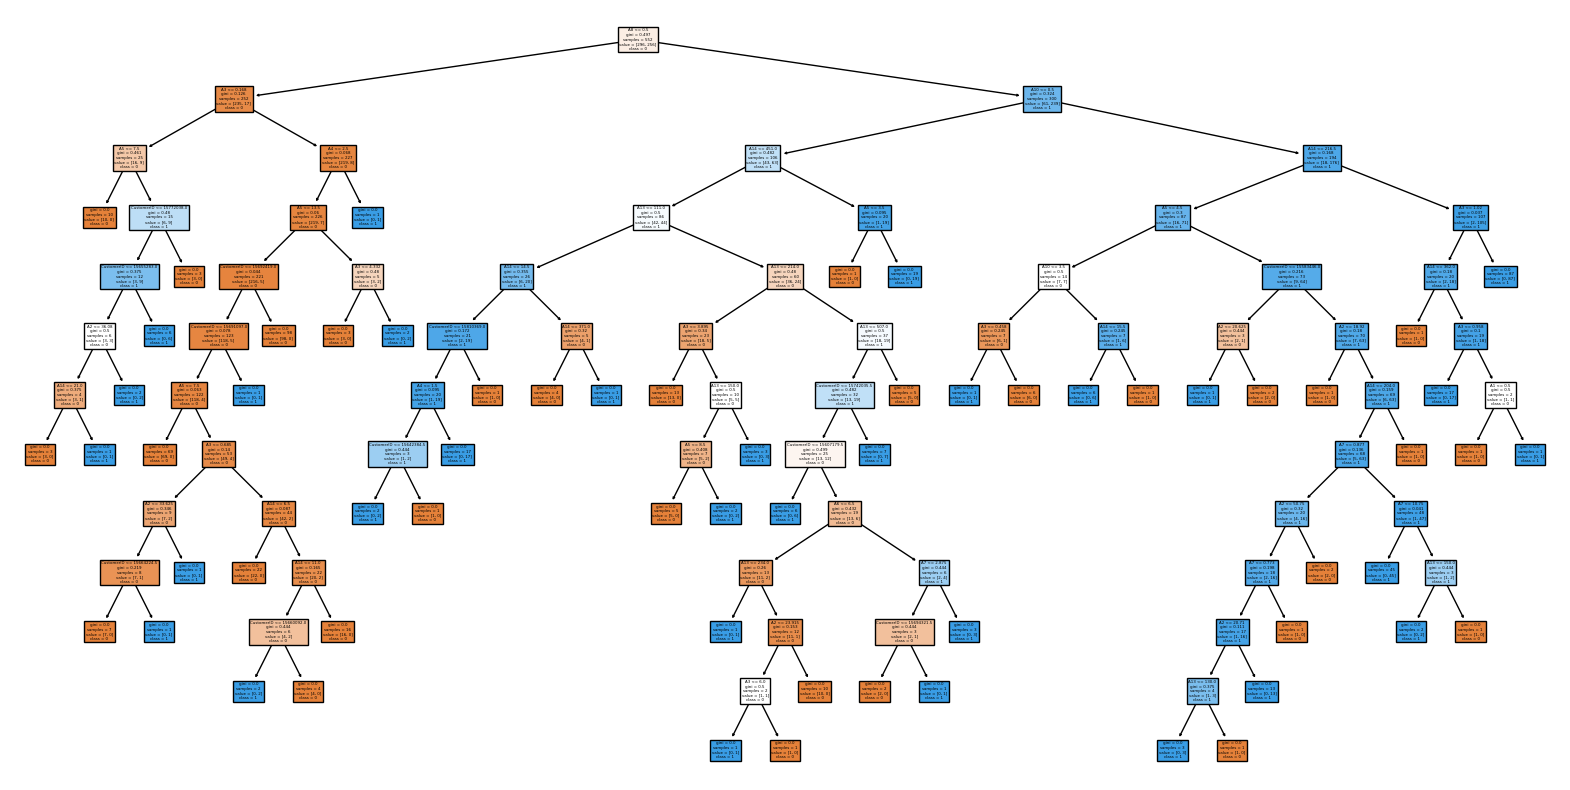

In [38]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()